# TRPLTN.PROYECT INT 1 S.5

**Como me ha ido muy bien en el curso TripleTen se me dio la oportinidad  hacer prácticas en el departamento analítico de Y.Afisha.Como primera tarea debo ayudar a optimizar los gastos de marketing.**

**tenemos registros del servidor con datos sobre las visitas a Y.Afisha desde enero de 2017 hasta diciembre de 2018;
Asi como un archivo con los pedidos en este periodo;
y tambien estadísticas de gastos de marketing.**

***debemos averiguar lo siguiente:***

***1.cómo los clientes usan el servicio;***

***2.cuándo empiezan a comprar;***

***3.cuánto dinero aporta cada cliente a la compañía;***

***4.cuándo los ingresos cubren el costo de adquisición de los clientes.***

Empezaremos importando las librerias necesarias y leyendo los archivos csv

In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
visits = ("visits_log_us.csv")

Orders = ("orders_log_us.csv")

costs = ("costs_us.csv")

In [179]:
df_visits = pd.read_csv('visits_log_us.csv')
df_sales = pd.read_csv('orders_log_us.csv')
df_costs = pd.read_csv('costs_us.csv')

Comenzaremos Analizando la tabal de visitas y realizando un preprocesamiento de datos de la misma.

In [180]:
df_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [181]:
df_visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 71.1 MB


Tenemos columnas de tipo objeto y de tipo entero, con una meroria usada de 79.3 MB en el Dataframe. Para responder las preguntas pertinentes debemos generar un cambio en el tipo de los datos, asi como colocar las columnas en firmato *sake_case* no sin antes verificar la precencia o ausencia de valores ausentes y duplicados.

In [182]:
df_visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

Al no tener vlores ausentes en nustras columnas, lo siguinete es verificar los valores duplicados.

In [183]:
df_visits.duplicated().sum()

0

In [184]:
df_visits.describe()

,Source Id,Uid
count,359400.000000,3.594000e+05
mean,3.750515,9.202557e+18
std,1.917116,5.298433e+18
min,1.000000,1.186350e+13
25%,3.000000,4.613407e+18
50%,4.000000,9.227413e+18
75%,5.000000,1.372824e+19
max,10.000000,1.844668e+19


Tenemos buenas metricas en nuestra tabla de visitas, vamos ha cambiar los tipos de datos para poder manejarlos mejor,como las columnas de incio y finalizacion de sesion y tambien la de dispositivo la transformaremos a una variebale categorica.

In [185]:
df_visits['Start Ts'] =  pd.to_datetime(df_visits['Start Ts'], format="%Y-%m-%d %H:%M:%S")
df_visits['End Ts'] =  pd.to_datetime(df_visits['End Ts'], format="%Y-%m-%d %H:%M:%S")
df_visits['Device'] = df_visits['Device'].astype('category')

In [186]:
df_visits.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


Aplicaremos formato *snake_case* a nuestras columnas para poder manejarlas mejor. tiene mucho menor espacio de almacenamiento y los datos son del tipo corecto, ahora solo nos queda renombrar las columnas para poder trabajr mas facil con ellas.

In [187]:
df_visits = df_visits.rename(columns={
    'Device' : 'device',
'End Ts' : 'end_ts',
'Source Id' : 'source_id',
    'Start Ts' : 'start_ts',
'Uid' : 'uid'})
df_visits.head()

,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


**De esta manera transformanos las columnas de nuestro dataframe al formato *snake_case* para llamarlos cuando necesitemos trabajar con cualquiera de ellas.Transfomamos los datos al tipo correcto y verificamos que no existan valores duplicados ni tampoco valores nulos. Asi que podremos continuar con nuestra siguiente tabla.**

In [188]:
df_sales.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [189]:
df_sales.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.0 MB


Este dataframe es corto pero es muy impoortante optimizarlo tabien y poder tenerlo lo mas limpio posible. de comento lo mas importante es verificar valoes ausentes y duplicados como transformar las columnas al tipo correcto.

In [190]:
df_sales.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

No tenemos valores ausentes en nuestra tabla, vamos a ver si hay valores duplicados.

In [191]:
df_sales.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
50410    False
50411    False
50412    False
50413    False
50414    False
Length: 50415, dtype: bool

Obtenemos un boleano de False que no sindica que tampoco contamos con ningun valor duplicado. Solo resta transformar las columnas al tipo correcto y aplicarles formato *snake_case* tambien.

In [192]:
df_sales['Buy Ts'] =  pd.to_datetime(df_sales['Buy Ts'], format="%Y-%m-%d %H:%M:%S")
df_sales.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


Ahora renombraremos las columnas para aplicales formato.

In [193]:
df_sales.columns

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')

In [194]:
df_sales = df_sales.rename(columns={
    'Buy Ts' : 'buy_ts',
'Revenue' : 'revenue',
'Uid' : 'uid',})
df_sales.head()

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


**Ahora que hemos transformado las columnas al tipo necesario, verificado la precencia o ausencia de valores nulos o duplicados, asi como haber aplicado formato *snake_case* para que se nos facilite llamar a las columnas de este DataFrame, continuaremos realizando este analisis con la siguiente tabla.**

In [195]:
df_costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [196]:
df_costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 186.3 KB


Tambien Observamos pocas columnas de suma importancia para evaluar los gastos del departamentro de marketing. Despues de de verificar los valores ausentes y duplicados podremos realizar las transformaciones pertinentes y tambien aplicar formato.

In [197]:
df_costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

No tenemos valores ausntes en los costos del marketing.

In [198]:
df_costs.duplicated().sum()

0

Y tampoco tenemos valores duplicados, revisemos ahora nuestras metricas.

In [199]:
df_costs.describe()

,source_id,costs
count,2542.000000,2542.000000
mean,4.857199,129.477427
std,3.181581,156.296628
min,1.000000,0.540000
25%,2.000000,21.945000
50%,4.000000,77.295000
75%,9.000000,170.065000
max,10.000000,1788.280000




Nuestras metricas son prometedoras y nos seran muy utiles si debemos realizar cualquier ilustracion de este DataFrame. Continuemos ahora con la transformacion de los datos al tipo correcto.

In [200]:
df_costs.columns

Index(['source_id', 'dt', 'costs'], dtype='object')

In [201]:
df_costs['dt'] =  pd.to_datetime(df_costs['dt'], format="%Y-%m-%d")
df_costs.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


**Como esta tabla, tiene todos sus valores en *snake_case*, no aplicariamos el formato pero si convertimos la fecha del gato a datetime, Ahora con nuestros datos limpios y optimizados podremos realizar el analisis por independiente de los que debemos averiguar.**

En primer lugar, vamos a ver verificar Cuántas personas  usan el aplicativo  cada día, semana y mes. Esto nos dara una idea de su comportamiento para una evaluasion mas profunda.En primer instancia craremos columnas para cada semana, dia y cada mes.

In [202]:
df_visits['day'] = df_visits['start_ts'].dt.date
df_visits['week'] = df_visits['start_ts'].dt.isocalendar().week
df_visits['month'] = df_visits['start_ts'].dt.to_period('M')
df_visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12



Asi obtenemos el columnas que corresponden al dai de la visita, se utiliza el metodo datetime dt.isocalendar().week, para obtener el número de semana del año de acuerdo con el calendario ISO. Y tambien Utilizamos .dt.to_period('M') para convertir el datetime a un periodo de mes, lo que representa el mes en un formato de periodo. de esta manera podremos seguir realizando las agrupaciones correspondinetes.

In [203]:
daily_users = df_visits.groupby('day')['uid'].nunique().reset_index()
daily_users.rename(columns={'uid': 'unique_users'}, inplace=True)
daily_users.head()

,day,unique_users
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


Asi pues, luego de  esta agrupacion notamos que existen mas de 800 ususarios por dia de la semana, despues de la primera mitad del año.

Contamos los usurios unicos de cada ia mediante una agrupacion. Vamos a realizar el mismo proceso para la semana y el mes tambien.

In [204]:
weekly_users = df_visits.groupby('week')['uid'].nunique().reset_index()
weekly_users.rename(columns={'uid': 'unique_users'}, inplace=True)
weekly_users.head()

,week,unique_users
0,1,6918
1,2,6703
2,3,6972
3,4,7060
4,5,8111


En el transcurso de la semana, tambien encontramos que los usuarios aumentan de 6000 a 8000 a partir de la semana numero 5.

In [205]:
monthly_users = df_visits.groupby('month')['uid'].nunique().reset_index()
monthly_users.rename(columns={'uid': 'unique_users'}, inplace=True)
monthly_users.head()

,month,unique_users
0,2017-06,13259
1,2017-07,14183
2,2017-08,11631
3,2017-09,18975
4,2017-10,29692


Y desde el mes de octubre los usuarios aumentan de 2000 en adelante.

**De esta manera concluimos que:  existen mas de 800 ususarios por dia de la semana, despues de la primera mitad del año.
 Los usuarios aumentan de 6000 a 8000 a partir de la semana numero 5.
 Y a nivel de mes los usurios tienen un gran aumento desde el mes de octubre, llegando a tener mas de 29000 visitas a partir de este mes.**


Lo siguiente seria averiguar Cuántas sesiones hay por día, ya  que Un/a usuario/a puede tener más de una sesión, Hecharemos un vistazo a las categoria de dispositivos mas utilizados para acceder al aplicativo de Y.Afisha.

In [206]:
df_visits['device'].value_counts()

device
desktop    262567
touch       96833
Name: count, dtype: int64

Parece que solo tenemos 2   valores en esta columna, y a pesar de que la mayoria de usuarios utilicen su computadora para acceder al aplicativo, pues tambien es cierto que puede haber usuarios/as, que tengan mas de una sesion aperturada con Y.Afisha.

In [207]:
df_visits['date'] = df_visits['start_ts'].dt.date
sessions_per_day = df_visits.groupby('day').size().reset_index(name='num_sessions')
display(df_visits)
sessions_per_day.head(10)

,device,end_ts,source_id,start_ts,uid,day,week,month,date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017-12-27
...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29,30,2017-07,2017-07-29
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25,4,2018-01,2018-01-25
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03,9,2018-03,2018-03-03
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02,44,2017-11,2017-11-02


,day,num_sessions
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893
5,2017-06-06,875
6,2017-06-07,788
7,2017-06-08,939
8,2017-06-09,755
9,2017-06-10,375


Extraemos la fecha de inicio de sesion, y la transformamos en una columna para  agruparla y contar el número de sesiones por día. Ahora tenemos cuantos inicios de sesion tenemos para cada dia en especifico. Solo nos resta graficar un grafico de lineas para visualizarla mejor.

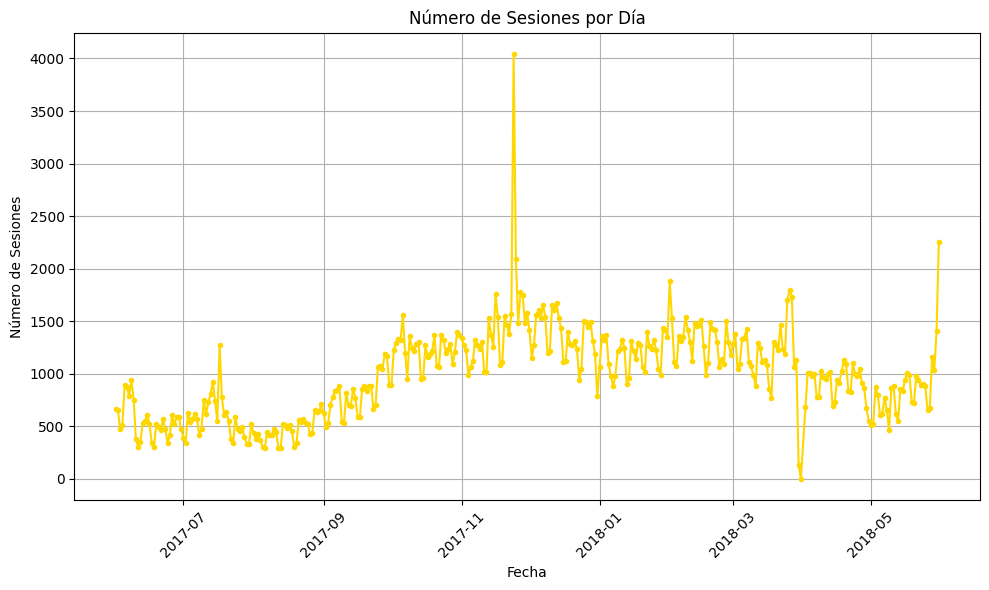

In [208]:
plt.figure(figsize=(10, 6))
plt.plot(sessions_per_day['day'], sessions_per_day['num_sessions'], marker='o', linestyle='-',  markersize=3, color='gold')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.title('Número de Sesiones por Día')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



**Ahora podremos ver de mejor manera, cuatas sesiones por dia indicando cada punto el dia en el que se incio la sesion. Con base a esto podriamos concluir que el dia que mas inicio de sesiones  tuvo fue el 14 de noviembre del 2017, con mas de 3000 inicios en ese dia en especifico.**

Ahora determinemos la duracion de cada una de las sesiones, para ello nos vamos a consentrar en las columnas de inicio y finalizacion de sesion, restando sus resultado de las mismas para obtener la duracion de cada una de las sesiones.

In [209]:
df_visits['session_duration'] = df_visits['end_ts'] - df_visits['start_ts']
df_visits['session_duration_minutes'] = df_visits['session_duration'].dt.total_seconds() / 60
df_visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,date,session_duration,session_duration_minutes
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,2017-12,2017-12-20,0 days 00:18:00,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2018-02,2018-02-19,0 days 00:28:00,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,2017-07,2017-07-01,0 days 00:00:00,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,2018-05,2018-05-20,0 days 00:24:00,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,2017-12,2017-12-27,0 days 00:00:00,0.0


**Asi obtenemos la diferencia de estas 2 columnas para determinar la duracion de cada sesion en especificon y la indicamos en minutos para que sea mas facil su interpretacion. La agregamos como columna a nuestro dataframe original para acceder a esta informacion cuando sea necesario.**

Para finalizar con la DataFrame de visitas, siempre es importante determinar la frecuencia con la que regresan los usuarios y usuarias a su sesion.Para esto necesitamos calcular la cantidad de días entre visitas para cada usuario. Esto nos dará una idea de la regularidad con la que cada usuario/a vuelve.

In [210]:
df_visits = df_visits.sort_values(by=['uid', 'start_ts'])
df_visits['previous_visit'] = df_visits.groupby('uid')['end_ts'].shift(1)
df_visits['time_between_visits'] = df_visits['end_ts'] - df_visits['previous_visit']
df_visits['days_between_visits'] = df_visits['time_between_visits'].dt.total_seconds() / (24 * 3600)
df_visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,date,session_duration,session_duration_minutes,previous_visit,time_between_visits,days_between_visits
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,9,2018-03,2018-03-01,0 days 00:06:00,6.0,NaT,NaT,NaN
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-06,6,2018-02,2018-02-06,0 days 00:02:00,2.0,NaT,NaT,NaN
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-07,23,2017-06,2017-06-07,0 days 00:01:00,1.0,NaT,NaT,NaN
173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-18,38,2017-09,2017-09-18,0 days 00:18:00,18.0,NaT,NaT,NaN
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,7,2018-02,2018-02-18,0 days 00:09:00,9.0,2017-09-18 23:07:00,152 days 16:19:00,152.679861


Ahora que realizamos el calculo de el tiempo entre visitas consecutivas para cada usuario y trasnformamos esta diferencia de tiempo a dias.Solo nos resta calcular la diferencia media de retorno para cada usuario y renombrar la columna para tener una mayor claridad de lo esta va a contener.

In [211]:
user_return_frequency = df_visits.groupby('uid')['days_between_visits'].mean().reset_index()
ser_return_frequency = user_return_frequency.rename(columns={'days_between_visits': 'average_days_between_visits'})
df_visits.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,date,session_duration,session_duration_minutes,previous_visit,time_between_visits,days_between_visits
196543,touch,2018-03-01 17:33:00,3,2018-03-01 17:27:00,11863502262781,2018-03-01,9,2018-03,2018-03-01,0 days 00:06:00,6.0,NaT,NaT,NaN
257333,touch,2018-02-06 15:57:00,2,2018-02-06 15:55:00,49537067089222,2018-02-06,6,2018-02,2018-02-06,0 days 00:02:00,2.0,NaT,NaT,NaN
173818,desktop,2017-06-07 18:48:00,3,2017-06-07 18:47:00,297729379853735,2017-06-07,23,2017-06,2017-06-07,0 days 00:01:00,1.0,NaT,NaT,NaN
173142,desktop,2017-09-18 23:07:00,2,2017-09-18 22:49:00,313578113262317,2017-09-18,38,2017-09,2017-09-18,0 days 00:18:00,18.0,NaT,NaT,NaN
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,7,2018-02,2018-02-18,0 days 00:09:00,9.0,2017-09-18 23:07:00,152 days 16:19:00,152.679861


Los valores ausentes, presentes en nustra tabla original se deben a que hay usuarios que no tienen un inicio de sesion especificado, pero para sacar conclusiones respecto al la frecuencia con la que regresan los usuarios a la sesion vamos a crear una tabal sin estos valores ausentes.

In [212]:
valid_intervals = df_visits[df_visits['days_between_visits'].notna()]
valid_intervals.head()

,device,end_ts,source_id,start_ts,uid,day,week,month,date,session_duration,session_duration_minutes,previous_visit,time_between_visits,days_between_visits
192554,desktop,2018-02-18 15:26:00,2,2018-02-18 15:17:00,313578113262317,2018-02-18,7,2018-02,2018-02-18,0 days 00:09:00,9.0,2017-09-18 23:07:00,152 days 16:19:00,152.679861
113873,desktop,2018-03-11 17:29:00,2,2018-03-11 17:23:00,313578113262317,2018-03-11,10,2018-03,2018-03-11,0 days 00:06:00,6.0,2018-02-18 15:26:00,21 days 02:03:00,21.085417
41778,desktop,2018-02-26 12:34:00,5,2018-02-26 12:33:00,325320750514679,2018-02-26,9,2018-02,2018-02-26,0 days 00:01:00,1.0,2017-09-30 14:38:00,148 days 21:56:00,148.913889
141543,desktop,2017-10-21 21:44:00,2,2017-10-21 20:52:00,526778907996220,2017-10-21,42,2017-10,2017-10-21,0 days 00:52:00,52.0,2017-10-21 18:14:00,0 days 03:30:00,0.145833
130654,desktop,2018-01-08 11:37:00,2,2018-01-08 11:34:00,526778907996220,2018-01-08,2,2018-01,2018-01-08,0 days 00:03:00,3.0,2017-10-21 21:44:00,78 days 13:53:00,78.578472


Vamos a utilizar esta tabla solo para relizar un histograma y visualizar la frecuencia con la que los usuarios que empiezan y terminan una sesion regresan para repetir este proceso.

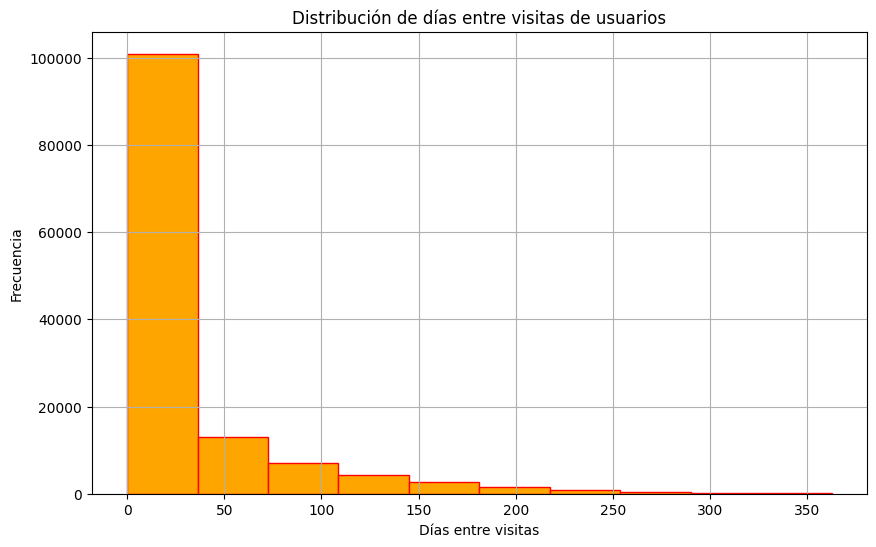

In [213]:
plt.figure(figsize=(10, 6))
plt.hist(valid_intervals['days_between_visits'], bins=10, edgecolor='red', color='orange')
plt.title('Distribución de días entre visitas de usuarios')
plt.xlabel('Días entre visitas')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

**De esta manera determinamos que los usuarios tienen mas frecuencia de regreso a la aplicasion durante los primeros 50 dias de su uso respectivo.**

Ahora vamos a nalizar el DataFrame de ventas para  obtener nuestras conclusiones respecto a esta tabla.

In [214]:
df_sales

,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


Tenemos optimizados los datops y es escencial que averiguemos cuando los usuarios comienzan a comprar y para esto necesitamos analizar el tiempo que transcurre entre el inicio de sesion de un usuario y el registro de su primera compra.

In [215]:
df_visits.columns

Index(['device', 'end_ts', 'source_id', 'start_ts', 'uid', 'day', 'week',
       'month', 'date', 'session_duration', 'session_duration_minutes',
       'previous_visit', 'time_between_visits', 'days_between_visits'],
      dtype='object')

In [216]:
df_sales.columns

Index(['buy_ts', 'revenue', 'uid'], dtype='object')

In [217]:
df_visits = df_visits[['uid', 'start_ts', 'source_id','device']]
df_sales = df_sales[['uid', 'buy_ts', 'revenue']]
display(df_visits)
display(df_sales)

,uid,start_ts,source_id,device
196543,11863502262781,2018-03-01 17:27:00,3,touch
257333,49537067089222,2018-02-06 15:55:00,2,touch
173818,297729379853735,2017-06-07 18:47:00,3,desktop
173142,313578113262317,2017-09-18 22:49:00,2,desktop
192554,313578113262317,2018-02-18 15:17:00,2,desktop
...,...,...,...,...
175259,18446424184725333426,2017-12-06 20:32:00,4,touch
293449,18446556406699109058,2018-01-01 16:29:00,3,touch
319162,18446621818809592527,2017-12-27 13:27:00,4,desktop
222173,18446621818809592527,2018-05-21 09:30:00,4,desktop


,uid,buy_ts,revenue
0,10329302124590727494,2017-06-01 00:10:00,17.00
1,11627257723692907447,2017-06-01 00:25:00,0.55
2,17903680561304213844,2017-06-01 00:27:00,0.37
3,16109239769442553005,2017-06-01 00:29:00,0.55
4,14200605875248379450,2017-06-01 07:58:00,0.37
...,...,...,...
50410,12296626599487328624,2018-05-31 23:50:00,4.64
50411,11369640365507475976,2018-05-31 23:50:00,5.80
50412,1786462140797698849,2018-05-31 23:54:00,0.30
50413,3993697860786194247,2018-05-31 23:56:00,3.67


Estas son las columnas que necesitamos para realizar este analisis, vamos a unir las tablas para poder calcular estas metricas.

In [218]:
df_merg_vs = pd.merge(df_visits, df_sales, on='uid', how='inner')
df_merg_vs

,uid,start_ts,source_id,device,buy_ts,revenue
0,313578113262317,2017-09-18 22:49:00,2,desktop,2018-01-03 21:51:00,0.55
1,313578113262317,2018-02-18 15:17:00,2,desktop,2018-01-03 21:51:00,0.55
2,313578113262317,2018-03-11 17:23:00,2,desktop,2018-01-03 21:51:00,0.55
3,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-03 10:13:00,1.22
4,1575281904278712,2017-06-03 10:13:00,10,touch,2017-06-03 17:39:00,1.83
...,...,...,...,...,...,...
761802,18446156210226471712,2018-02-19 10:17:00,1,touch,2018-02-18 19:34:00,9.78
761803,18446156210226471712,2018-02-20 12:47:00,1,desktop,2018-02-18 19:34:00,9.78
761804,18446156210226471712,2018-02-24 09:36:00,4,desktop,2018-02-18 19:34:00,9.78
761805,18446167067214817906,2017-10-17 10:05:00,5,desktop,2017-10-17 10:16:00,7.94


Ahora realizaremos nuestro analisis de cohortes relizando calculos con estos analisis.

In [219]:
df_merg_vs['conversion_days'] = (df_merg_vs['buy_ts'] - df_merg_vs['start_ts']).dt.days
display(df_merg_vs[['uid', 'start_ts', 'buy_ts', 'conversion_days']].head())

,uid,start_ts,buy_ts,conversion_days
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,106
1,313578113262317,2018-02-18 15:17:00,2018-01-03 21:51:00,-46
2,313578113262317,2018-03-11 17:23:00,2018-01-03 21:51:00,-67
3,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
4,1575281904278712,2017-06-03 10:13:00,2017-06-03 17:39:00,0


Ahora Vamos a crear cohortes basadas en la fecha de registro y calcular las tasas de conversión por cohorte, para poder agrupar por cohorte de registro y calcular el tiempo medio hasta la conversión.

In [220]:
df_merg_vs['registration_cohort'] = df_merg_vs['start_ts'].dt.to_period('M')
cohort_v = df_merg_vs.groupby('registration_cohort')['conversion_days'].agg(['count', 'mean'])
cohort_v.head()

,count,mean
registration_cohort,,
2017-06,25988,145.371710
2017-07,28986,109.642655
2017-08,32564,81.721932
2017-09,60757,65.435160
2017-10,71483,39.292531


Ya que tenemos datos utilies para nuestro Analisis de chortes, podremos graficar visualizasiones para comprender mejor los datos.

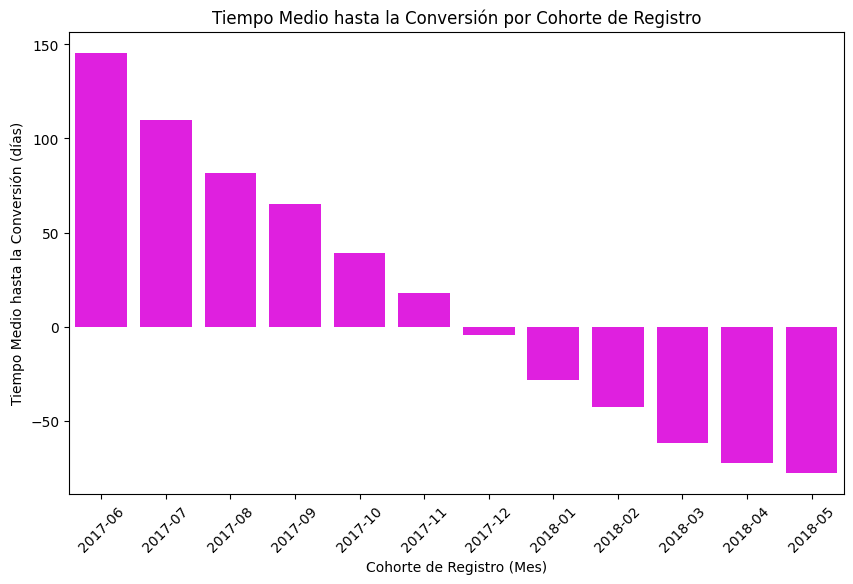

In [221]:
plt.figure(figsize=(10, 6))
sns.barplot(x=cohort_v.index.astype(str), y=cohort_v['mean'], color='magenta')
plt.xticks(rotation=45)
plt.xlabel('Cohorte de Registro (Mes)')
plt.ylabel('Tiempo Medio hasta la Conversión (días)')
plt.title('Tiempo Medio hasta la Conversión por Cohorte de Registro')
plt.show()

**Basado en este grafico poriamos concluir que la mayoria de los usuarios empiezan a comprar el mismo dia en el que inician la sesion, y van disminuyendo notablemente en el transcurso de los meses hasta el punto de tener una cesion inciciada y no realizar ninguna compra, esto puede deberse a que no estan usando el canal de marketing adecuado.**

Ahora vamos a evaluar tambien la la categoria del canal de voz ,mas efectivo, para esto agregaremos la columna del canal de marketing.

In [222]:
df_merg_vs['source_id'] = df_visits['source_id']
channel_v = df_merg_vs.groupby('source_id')['conversion_days'].agg(['count', 'mean'])
channel_v['mean'] = channel_v['mean'].round(2) 
channel_v.head()

,count,mean
source_id,,
1.0,34121,-2.23
2.0,47626,-2.68
3.0,85610,-2.28
4.0,101794,-2.28
5.0,66905,-3.24


Mediante este dataframe podremos evaluar el tiempo medio de conversión por canal de marketing, vamos a visualizarlo mejor mediante un grafico de barras.

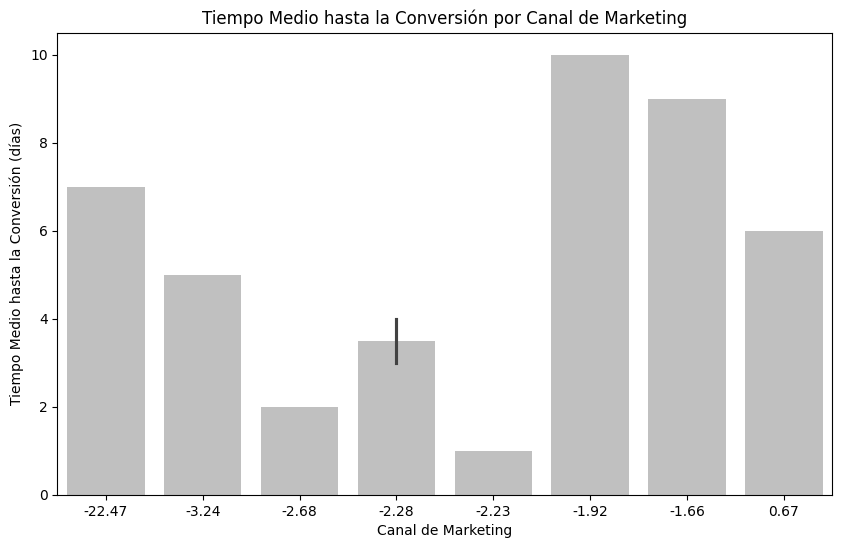

In [223]:
plt.figure(figsize=(10, 6))
sns.barplot(x=channel_v['mean'], y=channel_v.index, color='silver')
plt.xlabel('Canal de Marketing')
plt.ylabel('Tiempo Medio hasta la Conversión (días)')
plt.title('Tiempo Medio hasta la Conversión por Canal de Marketing')
plt.show()

**De esta manera determinamos que el canal de marketing que tiene mayor tiempo medio de conversion, es el -1.92 ya que tiene una mejor metrica en cuanto a el tiempo medio desde que el usuario inicio una sesion por primera vez hasta que realizo su primera compra.**

Ahora vamos a determinar cuantos pedidos son realizados en un periodo determinado de tiempo, como por ejemplo durante los primeros 20 minutos.

In [224]:
df_sales = df_sales.sort_values(by=['uid', 'buy_ts'])
df_sales['minutes_since_last_buy'] = df_sales.groupby('uid')['buy_ts'].diff().dt.total_seconds() / 60
df_first_minutes = df_sales[(df_sales['minutes_since_last_buy'] <= 20) & (df_sales['minutes_since_last_buy'] > 0)]
df_first_minutes.head()

,uid,buy_ts,revenue,minutes_since_last_buy
6613,12695041396440380,2017-09-02 00:02:00,7.33,8.0
17967,85604989211152119,2017-11-16 22:29:00,5.00,11.0
34866,98797997714437636,2018-02-14 19:11:00,1.69,10.0
15805,122824053382715327,2017-11-02 14:22:00,1.28,13.0
40096,138238870868487328,2018-03-16 11:11:00,1.40,5.0


Asi es como alculamos  el tiempo transcurrido en minutos entre cada compra y la compra inmediatamente anterior.

In [225]:
orders_per_minute = df_first_minutes.groupby(df_first_minutes['minutes_since_last_buy'].astype(int)).size()
orders_per_minute.head().reset_index()

,minutes_since_last_buy,0
0,2,4
1,3,8
2,4,24
3,5,27
4,6,20


Filtrar los pedidos realizados en los primeros 20 minutos desde cada compra, y verificamos los primeros registros para asegurarnos de que la columna 'minutes_since_first_buy' se ha añadido correctamente.

Para responder esta pregunta y determinar cuantos pedidos se realizan durante los primeros 20 minutos de  que el usuarios haya realizado su primera compra, vamos a visualizar los resultados mediante un grafico de barras.

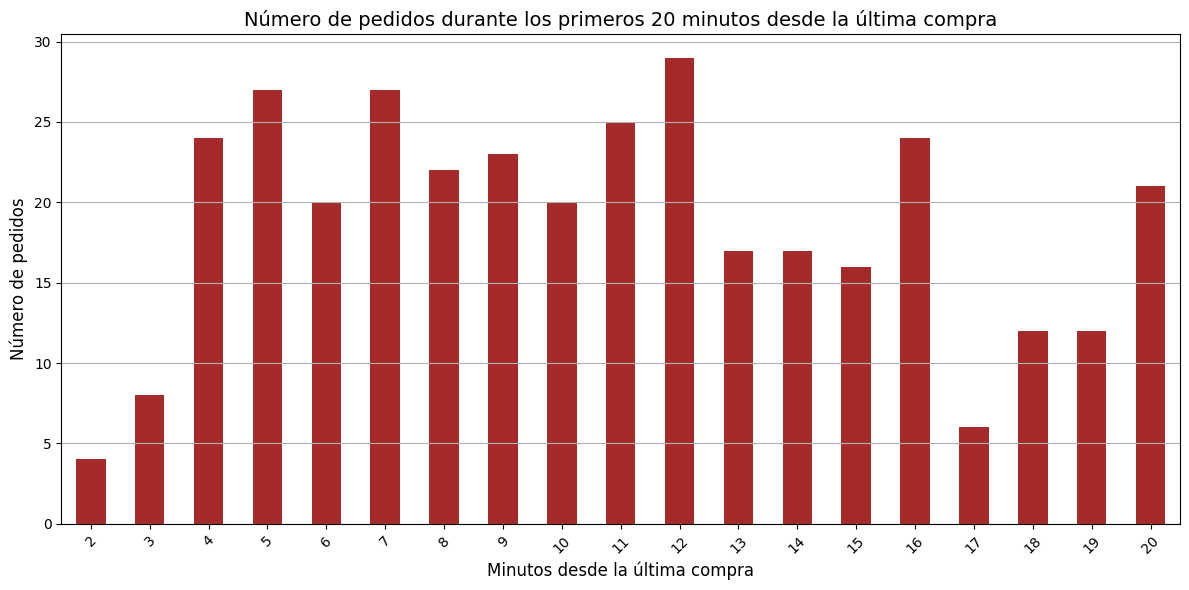

In [226]:
plt.figure(figsize=(12, 6))
orders_per_minute.plot(kind='bar', color='brown')
plt.xlabel('Minutos desde la última compra', fontsize=12)
plt.ylabel('Número de pedidos', fontsize=12)
plt.title('Número de pedidos durante los primeros 20 minutos desde la última compra', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

**Determinaos entonces que durante los primeros 20 minutos de haber inicado sesion, llegan ha realizarse hasta 30 pedidos mas. Esto podria ser una informacion bastante util para el departamento de marketing. Sobre cómo agilizar el proceso de compra en esos 20 minutos**

Tambien es importante determinar que tamaño tiene cada una de las compras para sersiorarnos del valor del beneficio que obtendriamos con cada una de ellas.Para ello vamos a calcular el valor medio de los registros de la columna 'revenue que representa el beneficio de cada pedido.

In [227]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50415 entries, 27944 to 13176
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     50415 non-null  uint64        
 1   buy_ts                  50415 non-null  datetime64[ns]
 2   revenue                 50415 non-null  float64       
 3   minutes_since_last_buy  13892 non-null  float64       
dtypes: datetime64[ns](1), float64(2), uint64(1)
memory usage: 1.9 MB


Despues de asegurar que el tipo de nustros datos sean correctos, procederemos ha realizar el calculo.

In [228]:
average_purchase_size = df_sales['revenue'].mean()
average_purchase_size

4.999646930477041

De esta manera determinamos el tamaño promedio de cada una de las compras, vamos a visualizarlas mejor.

In [229]:
df_sales['date'] = df_sales['buy_ts'].dt.date 
daily_average_purchase = df_sales.groupby('date')['revenue'].mean()
daily_average_purchase.head().reset_index()

,date,revenue
0,2017-06-01,4.056875
1,2017-06-02,2.919910
2,2017-06-03,2.484776
3,2017-06-04,2.957727
4,2017-06-05,2.742174


Podriamos decir que el tamaño de cada una de las compras oscila entre los 3000 y 4000 dolares pero para tomar una colcusion mas ecxacta, realizaremos un grafico de lineas para determinar el tamaño de cada compra por dia.

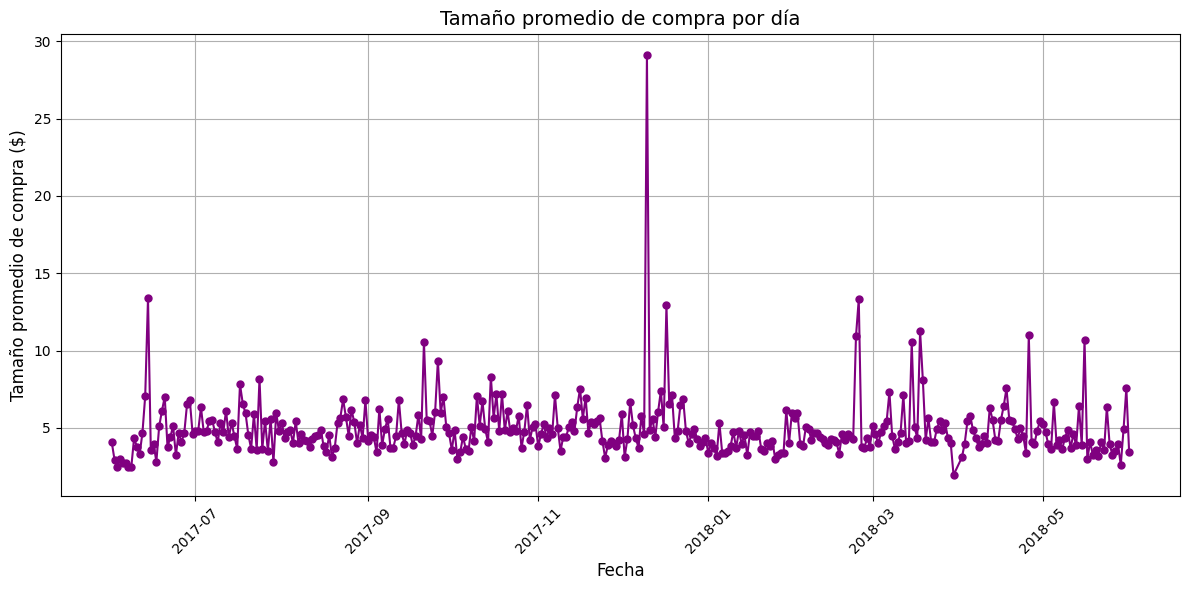

In [230]:
plt.figure(figsize=(12, 6))
plt.plot(daily_average_purchase.index, daily_average_purchase.values, marker='o', linestyle='-', color='purple', markersize=5)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Tamaño promedio de compra ($)', fontsize=12)
plt.title('Tamaño promedio de compra por día', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Entonces determinamos que el tamaño promedio de cada una de las compras es de 10 a 15  dolares y que el dia que tuvo mayor acntidad dei gresos fue entre el el 14 y 15 de diciembre del 2018. Esto debio  ocurrir por las promociones de navidad que propuso el departamento de marketing.**

Tambien es importante calcular cuanto dinero traen cada uno de los usuarios caculando el valor del ciclo de vida (LTV) de cada usuario.Este puede ser calculado a nivel de usuario/a  mediante te columna que tiene el benficio 'revenue' de cada pedido.

In [231]:
ltv_per_user = df_sales.groupby('uid')['revenue'].sum().reset_index()
ltv_per_user.columns = ['uid', 'LTV'] 
ltv_per_user.head()

,uid,LTV
0,313578113262317,0.55
1,1575281904278712,3.05
2,2429014661409475,73.33
3,2464366381792757,2.44
4,2551852515556206,10.99


Utilizamos directamente el atributo .columns, para determianr el valor del LTV de cada usuario en la tabla resultante y que tenga mayor claridad.

In [232]:
average_ltv = ltv_per_user['LTV'].mean()
average_ltv

6.901327930345262

In [233]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50415 entries, 27944 to 13176
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   uid                     50415 non-null  uint64        
 1   buy_ts                  50415 non-null  datetime64[ns]
 2   revenue                 50415 non-null  float64       
 3   minutes_since_last_buy  13892 non-null  float64       
 4   date                    50415 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1), uint64(1)
memory usage: 2.3+ MB


In [234]:
df_sales['cohort'] = df_sales.groupby('uid')['buy_ts'].transform('min')
df_sales['cohort_year_month'] = df_sales['cohort'].dt.to_period('M')
df_sales['age_in_months'] = ((df_sales['buy_ts'].dt.year - df_sales['cohort'].dt.year) * 12 + 
                             (df_sales['buy_ts'].dt.month - df_sales['cohort'].dt.month))
df_sales.head()

,uid,buy_ts,revenue,minutes_since_last_buy,date,cohort,cohort_year_month,age_in_months
27944,313578113262317,2018-01-03 21:51:00,0.55,NaN,2018-01-03,2018-01-03 21:51:00,2018-01,0
213,1575281904278712,2017-06-03 10:13:00,1.22,NaN,2017-06-03,2017-06-03 10:13:00,2017-06,0
252,1575281904278712,2017-06-03 17:39:00,1.83,446.0,2017-06-03,2017-06-03 10:13:00,2017-06,0
12235,2429014661409475,2017-10-11 18:33:00,73.33,NaN,2017-10-11,2017-10-11 18:33:00,2017-10,0
31462,2464366381792757,2018-01-28 15:54:00,2.44,NaN,2018-01-28,2018-01-28 15:54:00,2018-01,0


De esta manera calculamos la edad en meses para cada uno de los registros para determinar, en que rango de edad podria tener mas interes por parte del mercado. Ahora vamos a gruparlas por meses y por cohort.

In [235]:
ltv_cohort = df_sales.groupby(['cohort_year_month', 'age_in_months'])['revenue'].sum().reset_index()
ltv_cohort_pivot = ltv_cohort.pivot_table(index='cohort_year_month', columns='age_in_months', values='revenue', aggfunc='sum')
ltv_cohort_pivot.head()

age_in_months,0,1,2,3,4,5,6,7,8,9,10,11
cohort_year_month,,,,,,,,,,,,
2017-06,9557.49,981.82,885.34,1931.30,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,NaN
2017-08,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,NaN,NaN
2017-09,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,NaN,NaN,NaN
2017-10,21716.20,2325.21,830.65,682.01,657.77,522.37,368.10,501.14,NaN,NaN,NaN,NaN


Ahora los mostramos todo en un mapa de calor para una mejor visualizacion y obtner nuestra conclusion.

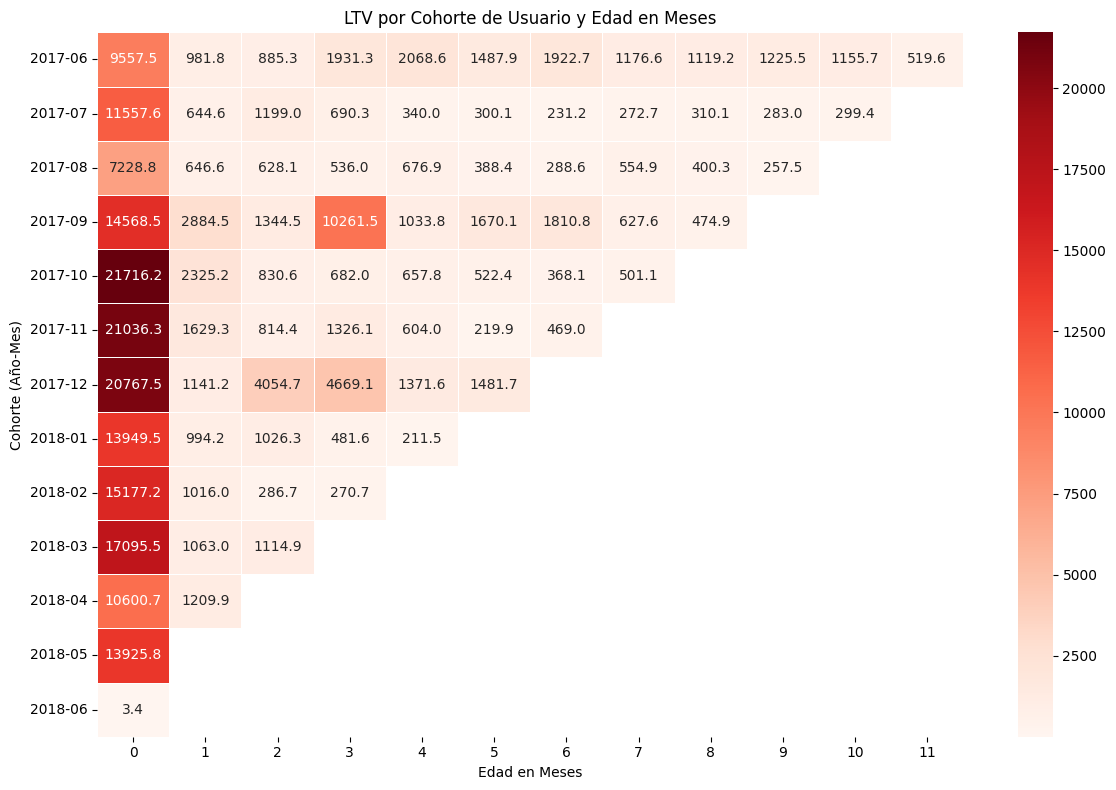

In [236]:
plt.figure(figsize=(12, 8))
sns.heatmap(ltv_cohort_pivot, cmap='Reds', annot=True, fmt=".1f", linewidths=.5)
plt.title('LTV por Cohorte de Usuario y Edad en Meses')
plt.xlabel('Edad en Meses')
plt.ylabel('Cohorte (Año-Mes)')
plt.tight_layout()
plt.show()

**Determinamos entonces que el beneficio promedio de cada uno de los usarios es de casi 700. Luego podemos agrupar por diferentes dimensiones (como cohortes de usuarios, canales de marketing, etc.) para análisis más profundos. Asi tambien determinamos como la cantidad de compras, disminuye a medida el cliente va avanzando desde su primer pedido.**

Ahora analizaremos los costos que requirio el departemeto de marketing para lograr el beneficio que ilustran las ventas y vamos ha aseguararnos que sus columnas del tipo correcto antes de hacer nuestros calculos.

In [237]:
display(df_costs.info())
df_costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Una vez que tenemos los tipos de datos correctos en las columnas, vamos a calcular el costo total de todas las fuentes de adquicision, y les daremos un nombre que sea claro para el calculo.

In [238]:
total_costs = df_costs['costs'].sum()
costs_per_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_per_source.columns = ['source_id', 'total_costs']
costs_per_source.head()

,source_id,total_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


Ahora tenemos una columna que nos indica el costo de cada una de las fuentes de adquicision del Marketing, es  de ver como se mueven los datos a lo largo del tiempo.

In [239]:
daily_costs = df_costs.groupby(df_costs['dt'].dt.date)['costs'].sum().reset_index()
daily_costs.columns = ['date', 'total_costs']
daily_costs.head()

,date,total_costs
0,2017-06-01,735.26
1,2017-06-02,721.19
2,2017-06-03,450.85
3,2017-06-04,761.16
4,2017-06-05,821.44


De esta manera tenemos el costo total para cada dia y vamos a visualizarlo mediante un grafico de barras.

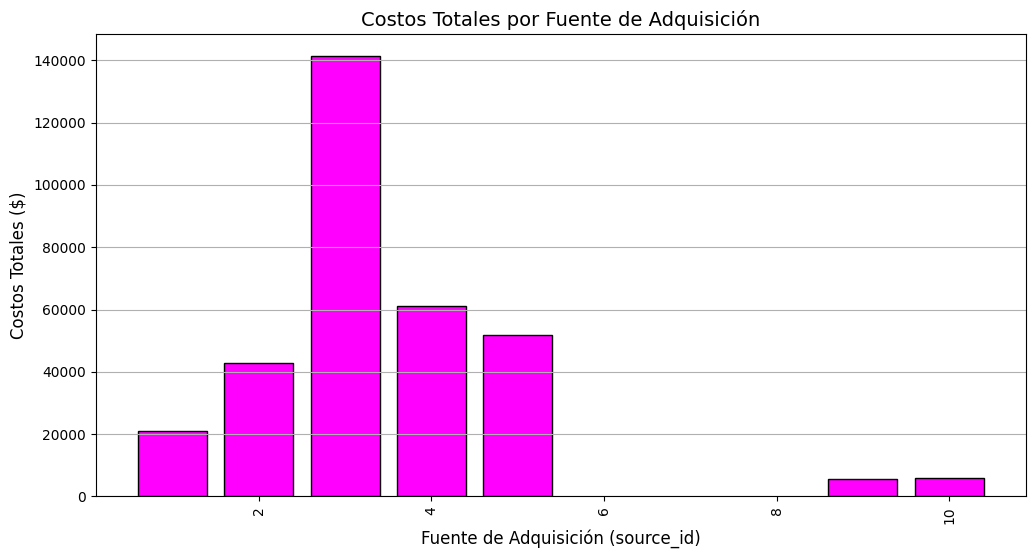

In [240]:
plt.figure(figsize=(12, 6))
plt.bar(costs_per_source['source_id'], costs_per_source['total_costs'], color='magenta', edgecolor='k')
plt.xlabel('Fuente de Adquisición (source_id)', fontsize=12)
plt.ylabel('Costos Totales ($)', fontsize=12)
plt.title('Costos Totales por Fuente de Adquisición', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**Determinamos mediante esta grafica que el costo toal mas alto de la fuente de adquicision de marketing, due de $140000 con la tercera fuente de adquicion.**

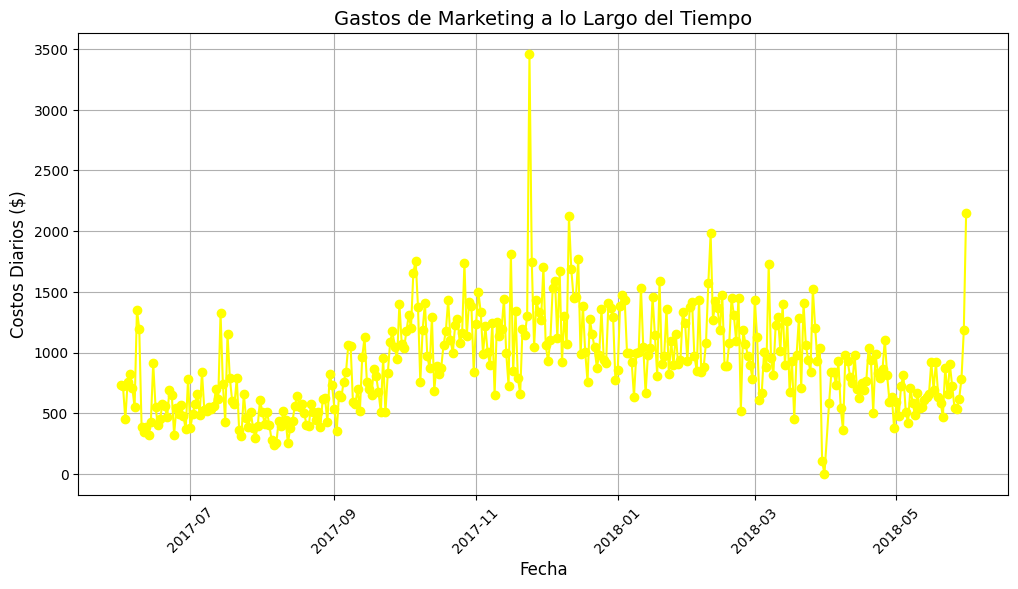

In [241]:
plt.figure(figsize=(12, 6))
plt.plot(daily_costs['date'], daily_costs['total_costs'], marker='o', linestyle='-', color='yellow')
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Costos Diarios ($)', fontsize=12)
plt.title('Gastos de Marketing a lo Largo del Tiempo', fontsize=14)
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Y es asi como como los costos de marketing se ven a lo largo del timepo simplificando cada punto en el grafico como un dia, siendo el dia que se gasto a mediados del mes de diciembre, llegando hasta los $3500 en los costos de adquisiscion de ese dia en particular.**

Es momneto de averiguar cuál fue el costo de adquisición de clientes de cada una de las fuentes (CAC),para esto sumaremos los costos de marketing por fuente de adquisición, y vamos a contar el número de clientes únicos que realizaron compras a partir de cada fuente (source_id) en df_visits.


In [242]:
costs_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()
costs_by_source.columns = ['source_id', 'total_marketing_costs']
costs_by_source.head()

,source_id,total_marketing_costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10


Es esta esta la columa que nos indicara cual es el costo de marketing para cada adquicision.

In [243]:
customers_by_source = df_visits[['uid', 'source_id']].drop_duplicates()
unique_customers_by_source = customers_by_source.groupby('source_id')['uid'].count().reset_index()
unique_customers_by_source.columns = ['source_id', 'unique_customers']
unique_customers_by_source.head()

,source_id,unique_customers
0,1,18999
1,2,26245
2,3,74756
3,4,83525
4,5,56974


Extrajimos la fuente de adquisición y el identificador de usuario único, y renombramos directamente las columnas para tener una mayor claridad de lo que nos muestran. Ahora tenemos una columna que nos indica la cantidad de clientes unicos por fuente de adquicision.

Ahora vamos a unir los datos para obtener el costo de adquicisicion de cliente (CAC), por fuente de adquicision.

In [244]:
cac_data = pd.merge(costs_by_source, unique_customers_by_source, on='source_id', how='inner')
cac_data['CAC'] = cac_data['total_marketing_costs'] / cac_data['unique_customers']
cac_data.head()

,source_id,total_marketing_costs,unique_customers,CAC
0,1,20833.27,18999,1.096546
1,2,42806.04,26245,1.631017
2,3,141321.63,74756,1.890439
3,4,61073.60,83525,0.731201
4,5,51757.10,56974,0.908434


Tenemos calculada el costo de adqucision de cada cliente por su fuente de adquicicion. Solo nos resta visualizarlo mejor para sacar conclusiones.

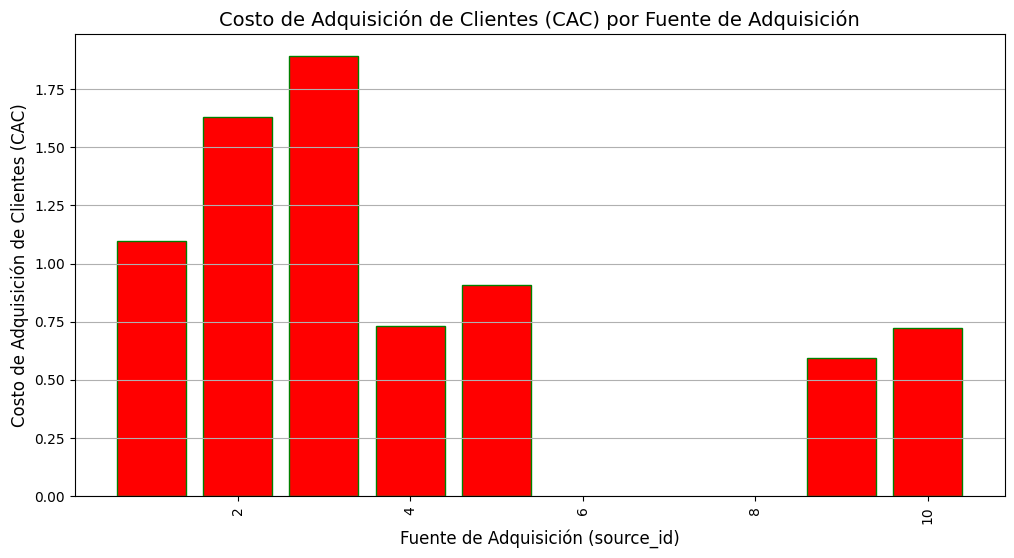

In [245]:
plt.figure(figsize=(12, 6))
plt.bar(cac_data['source_id'], cac_data['CAC'], color='red', edgecolor='g')
plt.xlabel('Fuente de Adquisición (source_id)', fontsize=12)
plt.ylabel('Costo de Adquisición de Clientes (CAC)', fontsize=12)
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente de Adquisición', fontsize=14)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

**Determinamos de esta manera que el costo de adquicision de cada clinte es maximo de $2 en la fuente de adquicsision numero 3, en el que supero el standar maximo de nuestra tabla.**

Es importante para sacar nuestras conclusiones, saber que tan rentables eran las inversiones o (ROMI). para calcular esta metrica, necesitamos comparar los ingresos generados por cada fuente de adquisición con los costos incurridos en esas fuentes.

In [246]:
df_sales_m = pd.merge(df_sales, df_visits[['uid', 'source_id']], on='uid', how='left')
revenue_by_source = df_sales_m.groupby('source_id')['revenue'].sum().reset_index()
revenue_by_source.rename(columns={'source_id': 'source_id_trs'}, inplace=True)
revenue_by_source.head()

,source_id_trs,revenue
0,1,2298200.17
1,2,2638189.21
2,3,296687.96
3,4,496690.17
4,5,1181477.14


In [247]:
df_sales.columns

Index(['uid', 'buy_ts', 'revenue', 'minutes_since_last_buy', 'date', 'cohort',
       'cohort_year_month', 'age_in_months'],
      dtype='object')

In [248]:
df_sales_m.columns

Index(['uid', 'buy_ts', 'revenue', 'minutes_since_last_buy', 'date', 'cohort',
       'cohort_year_month', 'age_in_months', 'source_id'],
      dtype='object')

Obtenemos el beneficio por cada fuente de anuncios y lo guardamos como una columna en el dataframe 'df_sales_m', para no afectar a nuestra tabla original, pero tambien vamos a utilizar esta tabla para hacer algunas operaciones donde se necesiten el beneficio por cada duente de anuncios con 'df_sales_m' .

Para calcular el retorno economico que generan  las  acciones (ROMI), debemos realizar algunas opereciones y vamos a visualizarlo mediante un grafico de calor y obtener excelentes conclusiones.

In [249]:
df_sales_m['year_month'] = df_sales['buy_ts'].dt.to_period('M')
df_costs['year_month'] = df_costs['dt'].dt.to_period('M')

 Como nuestras columnas ya estan en el formato encesario solo debebmos, extraer la fecha de las columnas que necesitaremos.

In [250]:
monthly_revenue_by_source = df_sales_m.groupby(['source_id', 'year_month'])['revenue'].sum().reset_index()
monthly_revenue_by_source.columns = ['source_id', 'year_month', 'total_revenue']

Calculamos asi el beneficio total que tenemos de cada fuente de adquicision, para despues calcular el costo de cada una de ellas.

In [251]:
monthly_costs_by_source = df_costs.groupby(['source_id', 'year_month'])['costs'].sum().reset_index()
monthly_costs_by_source.columns = ['source_id', 'year_month', 'total_marketing_costs']

Despues de obtener estos dos dataframes, solo debemos unirlos para realizar sobre esa tabla el calculo de l ROMI, dividiendo la diferencia entre el beneficio total y los costos del canal de marketing con estos mismos costos.

In [252]:
monthly_romi_data = pd.merge(monthly_revenue_by_source, monthly_costs_by_source, on=['source_id', 'year_month'], how='left')

In [253]:
monthly_romi_data['ROMI'] = (monthly_romi_data['total_revenue'] - monthly_romi_data['total_marketing_costs']) / monthly_romi_data['total_marketing_costs']
monthly_romi_data.head()

,source_id,year_month,total_revenue,total_marketing_costs,ROMI
0,1,2017-06,873.61,1125.61,-0.223879
1,1,2017-07,2489.49,1072.88,1.320381
2,1,2017-08,2287.58,951.81,1.403400
3,1,2017-09,18248.08,1502.01,11.149107
4,1,2017-10,6133.17,2315.75,1.648459


Ahora tambien unimos los ingresos totales con los costos de marketing por fuente de adquisición, y lo guardamos en la columna 'romi_data' para que esta nos indique el ROMI. Ahora vamos a mostrarlo en un mapa de calor.

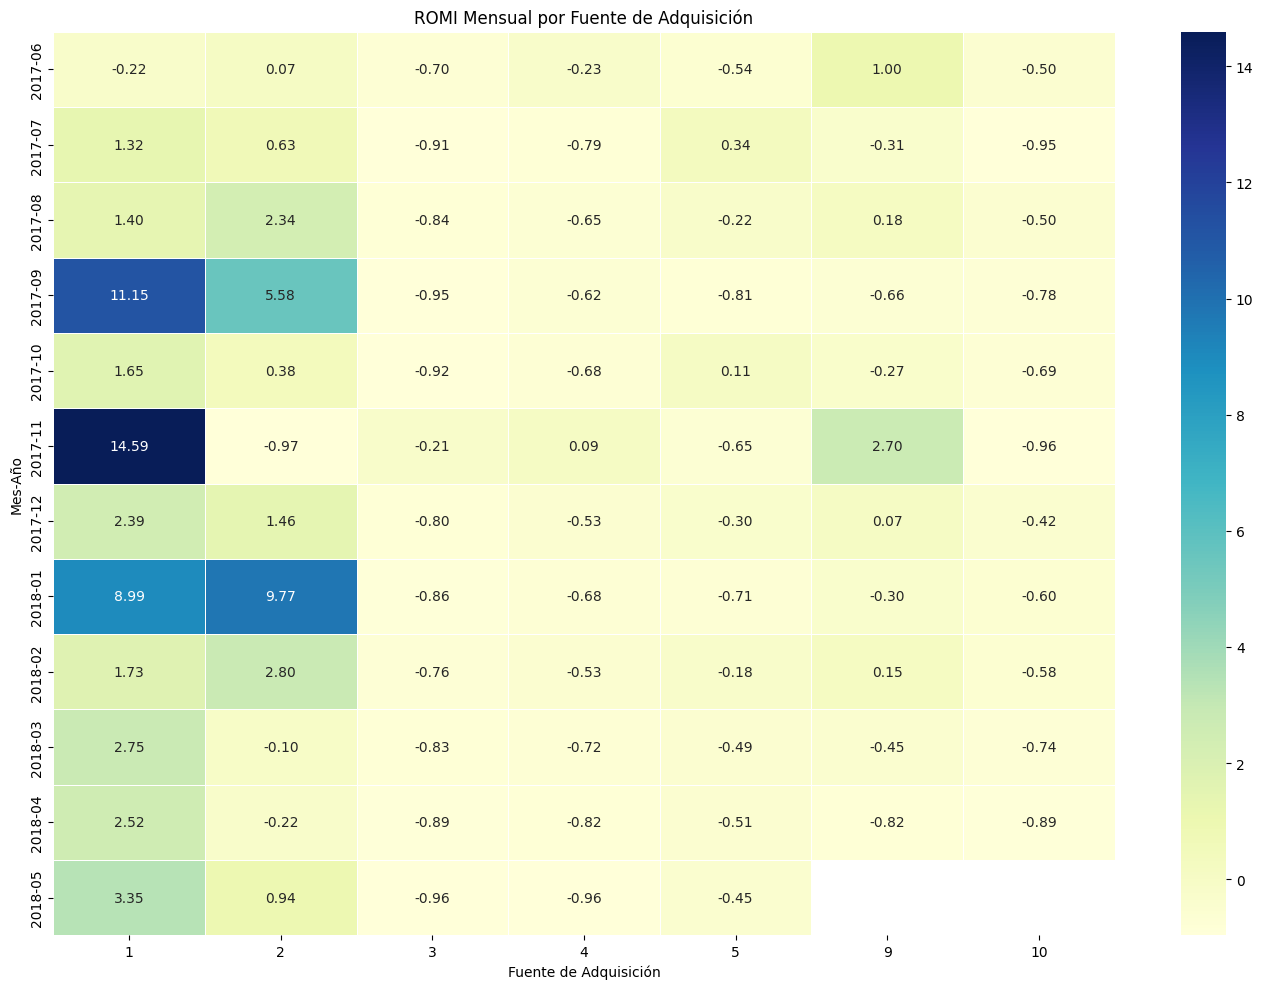

In [254]:
romi_pivot = monthly_romi_data.pivot_table(index='year_month', columns='source_id', values='ROMI', aggfunc='median')
plt.figure(figsize=(14, 10))
sns.heatmap(romi_pivot, cmap='YlGnBu', annot=True, fmt=".2f", linewidths=.5)
plt.title('ROMI Mensual por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('Mes-Año')

plt.tight_layout()
plt.show()

**Como era de esperarse, el mayor retrorno de los ingresos de las acciones del marketing (ROMI) tiene mayor beneficio en los primeros 2 dias y luego empieza a disminuir a medida va pasando el tiempo, algunos se mantienen pero la mayoria de ingresos baja a medida se van alejando del la primera interaccion.**


**Determinamos de esta forma que tan rentables eran nuestras inversiones, y podemos hacer uso de esta metrica para realizar varios analisis** 

Por ejemplo calcular Ingresos por Dispositivo y Fuente de Anuncio a lo Largo del Tiempo.

Para realizar estas visualizaciasiones debemos reducir nuestros dataframes, trabajando con una muestra de 100000 datos de cada uno de ellos.

In [255]:
df_visits_sample = df_visits.sample(n=100000, random_state=1)
df_sales_m_sample = df_sales_m.sample(n=100000, random_state=1)
display(df_visits_sample.info())
display(df_sales_m_sample.info())

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 286149 to 319611
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   uid        100000 non-null  uint64        
 1   start_ts   100000 non-null  datetime64[ns]
 2   source_id  100000 non-null  int64         
 3   device     100000 non-null  category      
dtypes: category(1), datetime64[ns](1), int64(1), uint64(1)
memory usage: 3.1 MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 212302 to 33297
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   uid                     100000 non-null  uint64        
 1   buy_ts                  100000 non-null  datetime64[ns]
 2   revenue                 100000 non-null  float64       
 3   minutes_since_last_buy  87179 non-null   float64       
 4   date                    100000 non-null  object        
 5   cohort                  100000 non-null  datetime64[ns]
 6   cohort_year_month       100000 non-null  period[M]     
 7   age_in_months           100000 non-null  int32         
 8   source_id               100000 non-null  int64         
 9   year_month              6578 non-null    period[M]     
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(1), period[M](2), uint64(1)
memory usage: 8.0+ MB


None

Luego de que nos sercioramos que  los tipos de datos estan ne el formato correcto, realizaremos una union de dataframes con el parametro suffixes para personar los sufijos e indicar cual es el benefico de las fuentes de anuncio y de las funetes de auncios de donde provienen los susuarios en las  vsisitas, 'df_visits'.

In [256]:
df_sales_m = pd.merge(df_sales, df_visits[['uid', 'source_id']], on='uid', how='left', suffixes=('_sales', '_visits'))
df_sales_m_sample['year_month'] = df_sales_m_sample['buy_ts'].dt.to_period('M')
df_sales_m_sample.head()

,uid,buy_ts,revenue,minutes_since_last_buy,date,cohort,cohort_year_month,age_in_months,source_id,year_month
212302,3644482766749211722,2018-01-05 16:26:00,5.00,4443.0,2018-01-05,2017-06-01 09:22:00,2017-06,7,5,2018-01
367598,6731421022966725351,2017-11-14 10:35:00,4.89,985.0,2017-11-14,2017-08-30 13:49:00,2017-08,3,5,2017-11
690423,13888745432979765063,2018-02-22 11:38:00,1.22,2998.0,2018-02-22,2017-06-05 11:39:00,2017-06,8,4,2018-02
219784,3644482766749211722,2018-02-07 11:33:00,3.05,8271.0,2018-02-07,2017-06-01 09:22:00,2017-06,8,5,2018-02
341893,6166747268563050393,2018-05-31 18:58:00,4.28,274.0,2018-05-31,2018-03-28 15:15:00,2018-03,2,2,2018-05


De esta manera, obstenermos  un dataframe que teiene a cada cohort y su respectivo ltv.Aahora vamos a visualizarlo mejor en un mapa de puntos, siendo cada uno de estos la fuente de adquicision paara porder evaluar su comportamiento a lo largo del tiempo.

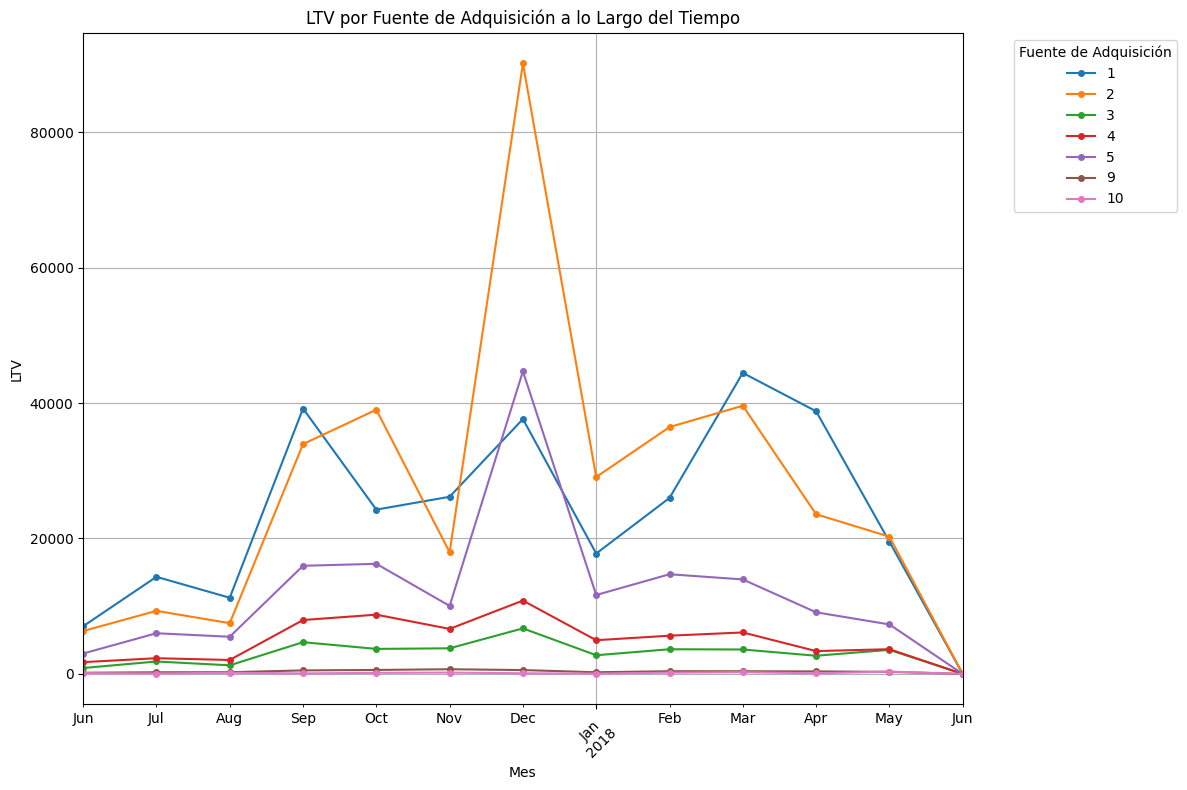

In [257]:
ltv_by_source_month = df_sales_m_sample.groupby(['year_month', 'source_id'])['revenue'].sum().unstack().fillna(0)
ltv_by_source_month.plot(figsize=(12,8),kind='line', marker='o', markersize=4)
plt.title('LTV por Fuente de Adquisición a lo Largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('LTV')
plt.legend(title='Fuente de Adquisición', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

**Determinamos de esta forma que la mejor fuente de adquicision fueron las promociones de navidad ya que en el mes de diciembre, tuvieron un mayor LTV que en otros meses.Esto pudo ser por las promociones y decuentos en epocas de navidad**